# Procesos estocásticos

In [2]:
library('diagram')

## Distribución límite 

Consideremos la Cadena de Markov (CM) con dos estados $\{0,1\}$

$$\textbf{P} =
\begin{pmatrix}
1-a  & a \\
b    & 1-b
\end{pmatrix}$$

con $a>0$, y $b<1$.

Se puede verificar que 

$$\textbf{P}^{(n)} = 
\frac{1}{a+b}
\begin{pmatrix}
b  & a \\
b    & a
\end{pmatrix}
+
\frac{(1-a+b)^n}{a+b}
\begin{pmatrix}
a  & -a \\
-b    & b
\end{pmatrix}
$$

Como $|1-a-b| < 1$, entonces, $(1-a-b)^n \rightarrow 0$ cuando $n \rightarrow \infty$, entonces


\begin{equation}
\textbf{P}^{(n)} = 
\frac{1}{a+b}
\begin{pmatrix}
b  & a \\
b    & a
\end{pmatrix}
\end{equation}

In [3]:
# Definimos
a <- 0.1  # a>0
b <- 0.45 # b<1


In [4]:
# definimos nuestra matriz
P <- matrix(c(1-a, a, b, 1-b), ncol=2, byrow = TRUE)
print(P)

     [,1] [,2]
[1,] 0.90 0.10
[2,] 0.45 0.55


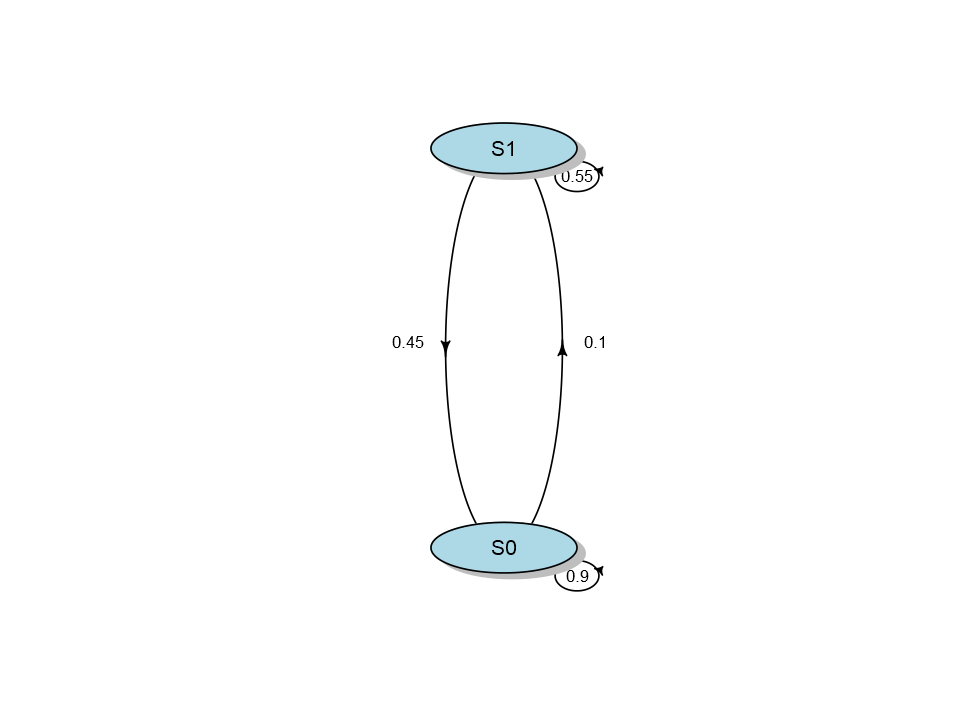

In [8]:
# Diagrama de transiciones
options(repr.plot.width=8, repr.plot.height=6)
plotmat(t(P),name=c("S0","S1"),
arr.length=0.3,arr.width=0.1,box.col="lightblue",box.lwd=1,box.prop=0.5,box.size=0.09,
box.type="circle",cex.txt=0.8,lwd=1,self.cex=0.3,
self.arrpos=0.3,self.shiftx=0.09,self.shifty=-0.05)

In [14]:
# Función para calcular la potencia de una matriz
mat.pow <- function(m, n){
  # inputs:
  #   m : matriz 
  #   n : potencia
  # outputs:
  #   Mn : matriz potencia n
  for(i in 1:n){
    if(i == 1){
      Mn <- m
    }else{
      Mn <- Mn%*%m
    }
  }
  return(Mn)
}

## Matriz de transición a dos pasos

In [6]:
# p^2 
P2 <- mat.pow(P, n=2)
print(P2)

       [,1]   [,2]
[1,] 0.8550 0.1450
[2,] 0.6525 0.3475


Matriz de transición de 10 pasos

In [40]:
# P^10
P10 <- mat.pow(P, n=10)
print(P10)

          [,1]      [,2]
[1,] 0.8182437 0.1817563
[2,] 0.8179032 0.1820968


Matriz de transición de 20 pasos

In [51]:
# P^20
P31 <- mat.pow(P, n=20)
print(P31)

          [,1]      [,2]
[1,] 0.8181818 0.1818182
[2,] 0.8181817 0.1818183


Podemos observar que los renglones de cada columna son casi iguales. Vamos a calcular la matriz estocástica para valores mayores de $n$.

In [28]:
n.max = 30
for(i in 1:n.max){
    Pn <- mat.pow(P, n=i)
    cat(paste('Matriz de probabilidades de transición a n= ', i, ' pasos \n', sep=''))
    print(Pn)
}

Matriz de probabilidades de transición a n= 1 pasos 
     [,1] [,2]
[1,] 0.90 0.10
[2,] 0.45 0.55
Matriz de probabilidades de transición a n= 2 pasos 
       [,1]   [,2]
[1,] 0.8550 0.1450
[2,] 0.6525 0.3475
Matriz de probabilidades de transición a n= 3 pasos 
         [,1]     [,2]
[1,] 0.834750 0.165250
[2,] 0.743625 0.256375
Matriz de probabilidades de transición a n= 4 pasos 
          [,1]      [,2]
[1,] 0.8256375 0.1743625
[2,] 0.7846313 0.2153688
Matriz de probabilidades de transición a n= 5 pasos 
          [,1]      [,2]
[1,] 0.8215369 0.1784631
[2,] 0.8030841 0.1969159
Matriz de probabilidades de transición a n= 6 pasos 
          [,1]      [,2]
[1,] 0.8196916 0.1803084
[2,] 0.8113878 0.1886122
Matriz de probabilidades de transición a n= 7 pasos 
          [,1]      [,2]
[1,] 0.8188612 0.1811388
[2,] 0.8151245 0.1848755
Matriz de probabilidades de transición a n= 8 pasos 
          [,1]      [,2]
[1,] 0.8184875 0.1815125
[2,] 0.8168060 0.1831940
Matriz de probabilidades de tr

Del resultado anterior podemos observar que para $n=30$
$$P_{1,1}=P_{2,1}=0.818181$$ 
tienen el mismo valor, y caso similar sucede con 
$$P_{1,2} = P_{2,2}= 0.181818$$  

Lo cual nos hace suponer que la cadena tendrá las mismas probabilidades de transición para n pasos sucesisvos mayores a $30$.

Para corroborar el resultado anterior, vamos a emplear el resultado que encontramos al inicio cuando $n \rightarrow \infty$
\begin{equation}
\textbf{P}^{(n)} = 
\frac{1}{a+b}
\begin{pmatrix}
b  & a \\
b    & a
\end{pmatrix}
\end{equation}

In [33]:
# Definimos
a <- 0.1  # a>0
b <- 0.45 # b<1

In [38]:
p11 =  b/(a+b)
cat(paste('p11 = ', p11, '\n',sep=''))
p12 = a/(a+b)
cat(paste('p12 = ', p12,sep=''))

p11 = 0.818181818181818
p12 = 0.181818181818182

\begin{equation}
\textbf{P}^{(n)} = 
\frac{1}{0.55}
\begin{pmatrix}
0.45  & 0.1 \\
0.45    & 0.1
\end{pmatrix}
=
\begin{pmatrix}
0.81818181  & 0.18181818 \\
0.81818181  & 0.18181818
\end{pmatrix}
\end{equation}

# Ejemplo: (Diagonalizando)



In [6]:
# Definimos
a <- 0.1  # a>0
b <- 0.45 # b<1

In [7]:
# definimos nuestra matriz
P <- matrix(c(1-a, a, b, 1-b), ncol=2, byrow = TRUE)
print(P)

     [,1] [,2]
[1,] 0.90 0.10
[2,] 0.45 0.55


In [8]:
# Función eigen() nos devuelve una lista con eigen valores y eigenvectores
E <- eigen(P)
print(E)

eigen() decomposition
$values
[1] 1.00 0.45

$vectors
          [,1]       [,2]
[1,] 0.7071068 -0.2169305
[2,] 0.7071068  0.9761871



In [9]:
# extraemos los eigenvectores
Q <- E$vectors
print(Q)

          [,1]       [,2]
[1,] 0.7071068 -0.2169305
[2,] 0.7071068  0.9761871


In [10]:
# Obtenemos la inversa de Q
Q.inversa <- solve(Q)
print(Q.inversa)

           [,1]      [,2]
[1,]  1.1570838 0.2571297
[2,] -0.8381404 0.8381404


In [11]:
# Extraemos los eigenvalores y formamos la matriz diagonal
D <- diag(E$values)
print(D)

     [,1] [,2]
[1,]    1 0.00
[2,]    0 0.45


 Comprobamos con la matriz de transición de un paso

In [12]:
P = Q%*%D%*%Q.inversa
print(P)

     [,1] [,2]
[1,] 0.90 0.10
[2,] 0.45 0.55


## Ejemplo:

 Si queremos hallar la distribución en $n=30$ pasos

es decir la probabilidad de que el estado se encuentre ya sea en el estado $j=0$ o $j=1$.Por lo que podemos emplear

\begin{equation}
P_{j}^n = \sum_{i} P_i^{0}  \ P_{i,j}^{n}, \text{ para }  j \in S
\end{equation}
en otros términos
\begin{equation}
P^n = P^{0} \ \textbf{P}^{(n)}
\end{equation}
donde:
-  $P^{n}$  es el vector  de la distribución a n pasos $P^{n} = (P_{0}^{n}, P_{1}^{n})=(P(X_{n}=0), P(X_{n}=1))$
-  $P^{0}$  es el vector  de la distribución inicial $P^0 = (P_{0}^0, P_{1}^0)=(P(X_{0}=0), P(X_{0}=1))$
-  $\textbf{P}$ es la matriz de transición de un paso

In [18]:
P30 <- Q%*%mat.pow(D, n=30)%*%Q.inversa
print(P30)

          [,1]      [,2]
[1,] 0.8181818 0.1818182
[2,] 0.8181818 0.1818182


Y la distribución suponiendo $P_0^0 = 1$, es decir $P^0 = (1, 0)$, por lo que 

In [19]:
p30 <- c(1,0) %*% P10
print(p30)

          [,1]      [,2]
[1,] 0.8181818 0.1818182


Es un resultado interesante por el hecho de que nos indica que para $n=30$ la transición a un estado no dpenderá de dónde se haya iniciado, es decir 

- $P_{i,1}^{30}= 0.8181818$, para $i \in \{0, 1\}$
- $P_{i,2}^{30}= 0.1818182$, para $i \in \{0, 1\}$
